<img src="https://cybersecurity-excellence-awards.com/wp-content/uploads/2017/06/366812.png">

<h1><center>Darwin Supervised Regression Model Building </center></h1>

# Prior to getting started:

First, 
<br>if you have just received a new api key from support, you will need to register your key and create a new user (see Register user cell)

Second, in the Environment Variables cell: 
1. Set your username and password to ensure that you're able to log in successfully
2. Set the path to the location of your datasets if you are using your own data.  The path is set for the examples.
3. Set the dataset names accordingly

Here are a few things to be mindful of:
1. For every run, check the job status (i.e. requested, failed, running, completed) and wait for job to complete before proceeding. 
2. If you're not satisfied with your model and think that Darwin can benefit from extra training, use the resume function.

## Set Darwin SDK

In [1]:
from amb_sdk.sdk import DarwinSdk
ds = DarwinSdk()
ds.set_url('https://amb-demo-api.sparkcognition.com/v1/')

(True, 'https://amb-demo-api.sparkcognition.com/v1/')

## Environment Variables

In [2]:
#Set your user id and password accordingly
USER="nsusanward@gmail.com"
PW="G8adjr4PCu"

# Set path to datasets - The default below assumes Jupyter was started from amb-sdk/examples/Enterprise/
# Modify accordingly if you wish to use your own data
PATH_TO_DATASET=''
DATASET_NAME='mergedData.csv'

# A timestamp is used to create a unique name in the event you execute the workflow multiple times or with 
# different datasets.  File names must be unique in Darwin.
import datetime
ts = '{:%Y%m%d%H%M%S}'.format(datetime.datetime.now())


## Import necessary libraries

In [3]:
# Import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import numpy as np
from sklearn.metrics import r2_score

# User Login 

In [4]:
status, msg = ds.auth_login_user(USER,PW)
if not status:
    print(msg)

# Data Upload

**Read dataset and view a file snippet**

In [5]:
# Preview dataset
df = pd.read_csv(os.path.join(PATH_TO_DATASET, DATASET_NAME))
df.head()

,Unnamed: 0,Geo_FIPS,percSOV,OBJECTID,GEOID10,TRFIPS,CFIPS,SFIPS,CSA,CSA_Name,...,D5cr,D5cri,D5ce,D5cei,D5dr,D5dri,D5de,D5dei,Shape_Length,Shape_Area
0,0,10010201001,0.887006,427,10010201001,20100,1,1,388.0,"Montgomery-Alexander City, AL",...,0.002123,0.31,0.25,0.45,-99999.0,-99999.0,-99999.0,-99999.0,0.110807,0.000410
1,1,10010201002,0.894172,1668,10010201002,20100,1,1,388.0,"Montgomery-Alexander City, AL",...,0.001654,0.24,0.20,0.36,-99999.0,-99999.0,-99999.0,-99999.0,0.096808,0.000534
2,2,10010202001,0.854737,217,10010202001,20200,1,1,388.0,"Montgomery-Alexander City, AL",...,0.001931,0.29,0.24,0.43,-99999.0,-99999.0,-99999.0,-99999.0,0.062129,0.000197
3,3,10010202002,0.973392,216,10010202002,20200,1,1,388.0,"Montgomery-Alexander City, AL",...,0.002335,0.35,0.28,0.50,-99999.0,-99999.0,-99999.0,-99999.0,0.052277,0.000124
4,4,10010203001,0.912568,207,10010203001,20300,1,1,388.0,"Montgomery-Alexander City, AL",...,0.002256,0.33,0.28,0.50,-99999.0,-99999.0,-99999.0,-99999.0,0.089441,0.000372


**Upload dataset to Darwin**

In [6]:
# Upload dataset
status, dataset = ds.upload_dataset(os.path.join(PATH_TO_DATASET, DATASET_NAME))
if not status:
    print(dataset)

400: BAD REQUEST - {"message": "Dataset already exists"}



**Clean dataset**

In [7]:
# clean dataset
target = "percSOV"
status, job_id = ds.clean_data(DATASET_NAME, target = target)

if status:
    ds.wait_for_job(job_id['job_name'])
    print("hello")
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-02T15:57:30.690535', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['mergedData.csv'], 'artifact_names': ['6d9c10e9edb5497fb2ee367db1fabf23'], 'model_name': None, 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-02T15:57:30.690535', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['mergedData.csv'], 'artifact_names': ['6d9c10e9edb5497fb2ee367db1fabf23'], 'model_name': None, 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-02T15:57:30.690535', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['mergedData.csv'], 'artifact_names': ['6d9c10e9edb5497fb2ee367db1fabf23'], 'model_name': None, 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-02T15:57:30.690535', 'endtime': '2019-04-02T15:58:03.0

# Create and Train Model 

We will now build a model that will learn the class labels in the target column.<br> In the default boston dataset, the target column is "Assessed_Value". <br> You will have to specify your own target name for your custom dataset. <br> You can also increase max_train_time for longer training.


In [8]:
model = target + "_model0" + ts
status, job_id = ds.create_model(dataset_names = DATASET_NAME, \
                                 model_name =  model, \
                                 max_train_time = '00:02')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-02T15:58:27.091516', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['mergedData.csv'], 'artifact_names': None, 'model_name': 'percSOV_model020190402155627', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-02T15:58:27.091516', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['mergedData.csv'], 'artifact_names': None, 'model_name': 'percSOV_model020190402155627', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-02T15:58:27.091516', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['mergedData.csv'], 'artifact_names': None, 'model_name': 'percSOV_model020190402155627', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-02T15:58:27.091516', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'los

# Extra Training (Optional)
Run the following cell for extra training, no need to specify parameters

In [9]:
# Train some more
status, job_id = ds.resume_training_model(dataset_names = DATASET_NAME,
                                          model_name = model,
                                          max_train_time = '00:05')
                                          
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-02T16:06:24.638087', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.5800882577896118, 'generations': 1, 'dataset_names': ['mergedData.csv'], 'artifact_names': None, 'model_name': 'percSOV_model020190402155627', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-02T16:06:24.638087', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.5800882577896118, 'generations': 1, 'dataset_names': ['mergedData.csv'], 'artifact_names': None, 'model_name': 'percSOV_model020190402155627', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-02T16:06:24.638087', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.5800882577896118, 'generations': 1, 'dataset_names': ['mergedData.csv'], 'artifact_names': None, 'model_name': 'percSOV_model020190402155627', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-02T16:06:24.638087', 'endtime': None, 'percent

# Analyze Model
Analyze model provides feature importance ranked by the model. <br> It indicates a general view of which features pose a bigger impact on the model

In [10]:
# Retrieve feature importance of built model
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])

{'status': 'Running', 'starttime': '2019-04-02T16:14:59.740878', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 0.5800882577896118, 'generations': 4, 'dataset_names': None, 'artifact_names': ['be0917127561416e9333a582eba8ede5'], 'model_name': 'percSOV_model020190402155627', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-02T16:14:59.740878', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 0.5800882577896118, 'generations': 4, 'dataset_names': None, 'artifact_names': ['be0917127561416e9333a582eba8ede5'], 'model_name': 'percSOV_model020190402155627', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-02T16:14:59.740878', 'endtime': '2019-04-02T16:15:23.059883', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 0.5800882577896118, 'generations': 4, 'dataset_names': None, 'artifact_names': ['be0917127561416e9333a582eba8ede5'], 'model_name': 'percSOV_model020190402155627', 'job_error': ''}


Show the 10 most important features of the model.

In [11]:
feature_importance[:10]

D4d             0.336858
PCT_AO2P        0.124899
OBJECTID        0.122142
PCT_AO0         0.105514
D5br            0.031927
R_PCTLOWWAGE    0.027286
P_WRKAGE        0.026009
Shape_Area      0.022484
Shape_Length    0.021352
SFIPS = 5       0.013601
dtype: float64

# Predictions
**Perform model prediction on the the training dataset.**

In [12]:
status, artifact = ds.run_model(DATASET_NAME, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2019-04-02T16:22:26.299097', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 0.5800882577896118, 'generations': 4, 'dataset_names': ['mergedData.csv'], 'artifact_names': ['22936f4bb4dc450e8f211eb1d8bd5152'], 'model_name': 'percSOV_model020190402155627', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-02T16:22:26.299097', 'endtime': '2019-04-02T16:22:39.115618', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.5800882577896118, 'generations': 4, 'dataset_names': ['mergedData.csv'], 'artifact_names': ['22936f4bb4dc450e8f211eb1d8bd5152'], 'model_name': 'percSOV_model020190402155627', 'job_error': ''}


(True, 'Job completed')

Download predictions from Darwin's server.

In [47]:
#status, prediction = ds.download_artifact(artifact['artifact_name'])
#print(prediction)
#pred_list = prediction['percSOV']
#print(len(df[target]))
#print(prediction.isnull(prediction['percSOV']))
print(df[target])
print(prediction[target])

0        0.887006
1        0.894172
2        0.854737
3        0.973392
4        0.912568
5        0.862620
6        0.800789
7        0.835092
8        0.942529
9        1.000000
10       0.986330
11       0.935077
12       0.953008
13       0.884654
14       0.818182
15       0.894667
16       0.833910
17       0.834437
18       0.864273
19       0.831461
20       0.834879
21       0.938751
22       0.809836
23       0.852336
24       0.898013
25       0.975567
26       0.981785
27       0.953271
28       0.760155
29       0.700680
           ...   
39581    0.890244
39582    0.807910
39583    0.819085
39584    0.785571
39585    0.920420
39586    0.762295
39587    0.632075
39588    0.855114
39589    0.860860
39590    0.791320
39591    0.642045
39592    0.618391
39593    0.758958
39594    0.910026
39595    0.982249
39596    0.950688
39597    0.854962
39598    0.779056
39599    0.777778
39600    0.810401
39601    0.855769
39602    0.720488
39603    0.858025
39604    0.817863
39605    1

Create plots comparing predictions with actual target

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

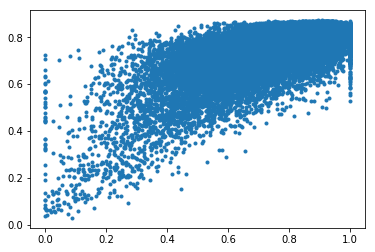

In [33]:
#Plot predictions vs actual
plt.plot(df[target], prediction[target], '.')
#plt.plot([0,2.3e7],[0,2.3e7],'--k')
print('R^2 : ', r2_score(df[target], prediction[target]))

## Find out which machine learning model did Darwin use:

In [15]:
status, model_type = ds.lookup_model_name(model)
print(model_type['description']['best_genome'])

{'type': 'XGBRegressor', 'parameters': {}}
